# Le changement climatique

### Chargement des librairies

In [291]:
# chargement des extensions
%reload_ext autoreload
%autoreload 2

from modules.helper import Helper
from pandas_profiling import ProfileReport
import pandas as pd
import sys
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

print(sys.executable)

C:\Users\utilisateur\anaconda3\envs\climatologie\python.exe


## Pre-traitement des données

### Chargement des données bruts

In [ ]:
df_temperatures = Helper.load_data()

### Creation d'un rapport initial sur les données bruts

In [ ]:
Helper.save_report(df_temperatures_cleaned, 'rapport_initial')

### Pré-traitement et nettoyage des données

In [ ]:
df_temperatures_cleaned = Helper.preprocessing(df_temperatures)

In [ ]:
### Creation d'un rapport final sur les données bruts

In [ ]:
Helper.save_report(df_temperatures_cleaned, 'rapport_final')

## Analyses

### Les températures moyennes françaises de 1995 à 2019

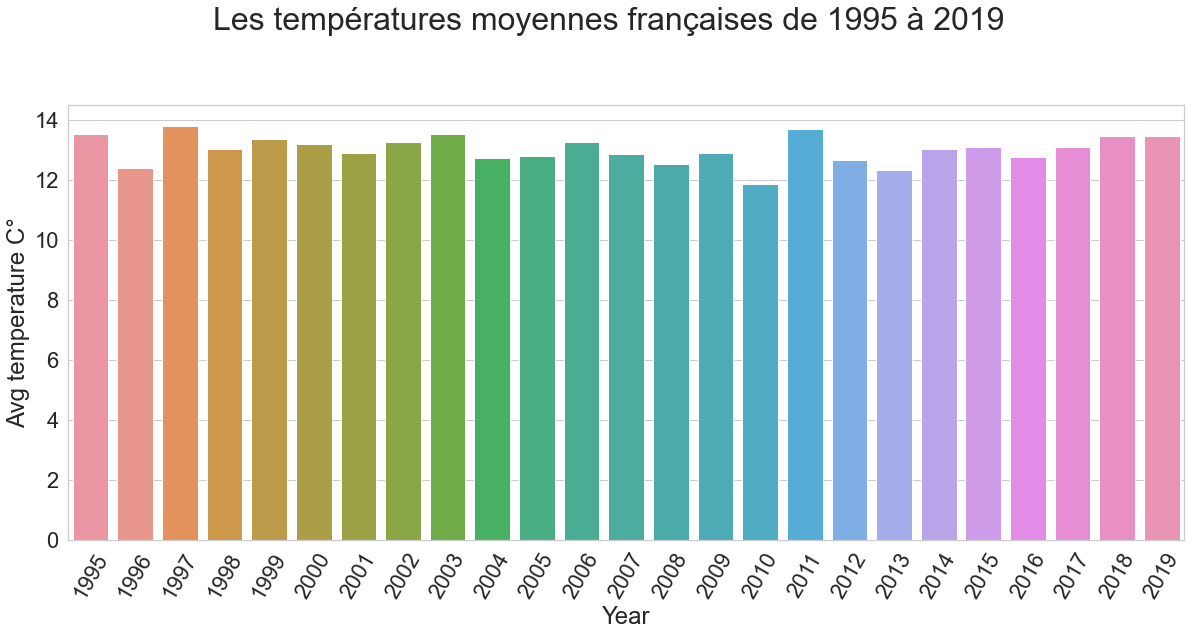

In [292]:
country = df_temperatures_cleaned['Country'] == 'France'
df_req_1 = df_temperatures_cleaned.loc[country].groupby(["Year"])["AvgTemperature"].mean()
df_req_1 = df_req_1.reset_index()
df_req_1.columns = ['Year','AvgTemperature']

# Generate plot of percentage of wet commutes
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Year", y="AvgTemperature", data=df_req_1.sort_values('AvgTemperature', ascending=False))
plt.xlabel("Year")
plt.ylabel("Avg temperature C°")
plt.suptitle("Les températures moyennes françaises de 1995 à 2019", y=1.05, fontsize=32)
plt.xticks(rotation=60)
plt.savefig("../data/analysis/avg_temperature_france.png", bbox_inches='tight')

### L'évolution moyenne de la témparature chaque mois de l'année de chaque région du globe

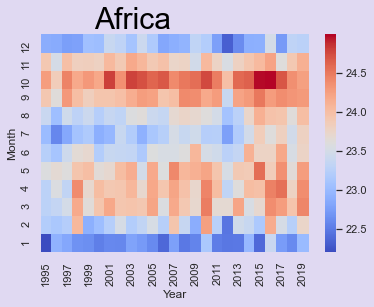

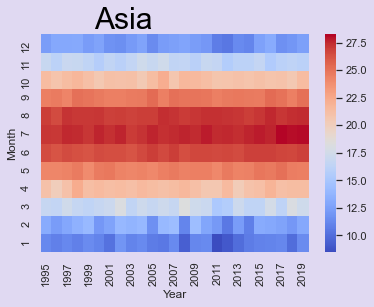

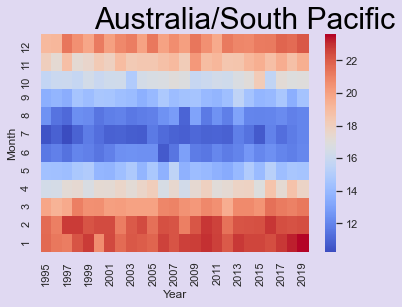

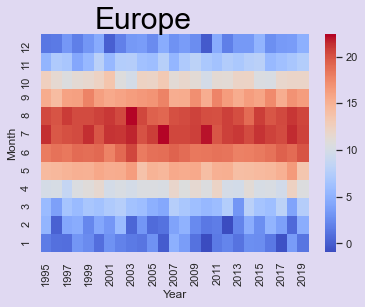

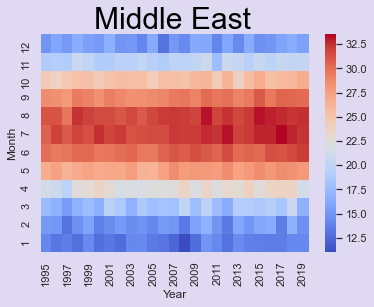

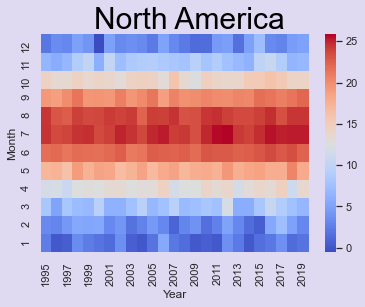

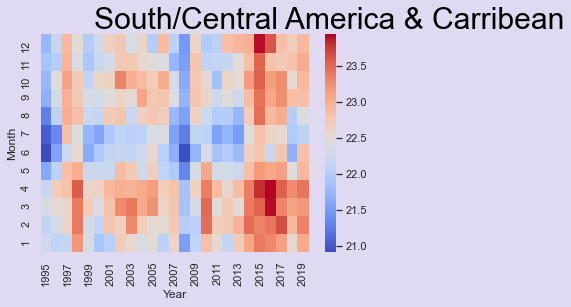

In [302]:
df_req_2 = df_temperatures_cleaned.groupby(['Region','Year','Month'])['AvgTemperature'].mean()
df_req_2 = df_req_2.reset_index()
df_req_2.columns = ['Region','Year','Month','AvgTemperature']
regions = df_req_2.Region.unique().tolist()

for region in regions:
    df_req_temp = df_req_2[df_req_2['Region'] == region]
    df_req_temp_col_specified = df_req_temp[['Year','Month','AvgTemperature']]
    df = pd.pivot_table(df_req_temp_col_specified, index='Month', values='AvgTemperature', columns='Year')
    
    plt.rcParams['font.size'] = 12
    bg_color = (0.88,0.85,0.95)
    plt.rcParams['figure.facecolor'] = bg_color
    plt.rcParams['axes.facecolor'] = bg_color
    fig, ax = plt.subplots(1)
    p = sns.heatmap(df, cmap='coolwarm', yticklabels=True, ax=ax)
    plt.xlabel('Year')
    plt.ylabel('Month')
    ax.set_ylim((0,12))
    plt.text(5,12.3, region, fontsize = 30, color='Black')

### Classement graphique des pays les plus chauds au monde

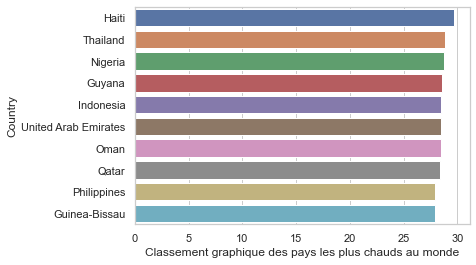

In [294]:
df_req_3 = df_temperatures_cleaned.groupby(["Country"])["AvgTemperature"].mean().reset_index()
df_req_3_sorted = df_req_3.sort_values(by='AvgTemperature', ascending=False)
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="Country", x="AvgTemperature", data=df_req_3_sorted.head(10))
ax.set(xlabel='Classement graphique des pays les plus chauds au monde')
plt.show()

### Classement graphique des pays les plus chauds au monde

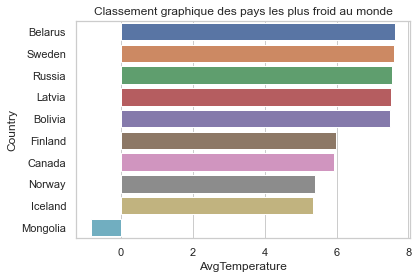

In [295]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="Country", x="AvgTemperature", data=df_req_3_sorted.tail(10))
ax.set(title='Classement graphique des pays les plus froid au monde')
plt.show()

### L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019

Text(0.5, 1.0, 'Lévolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 en Haiti et Mongolia')

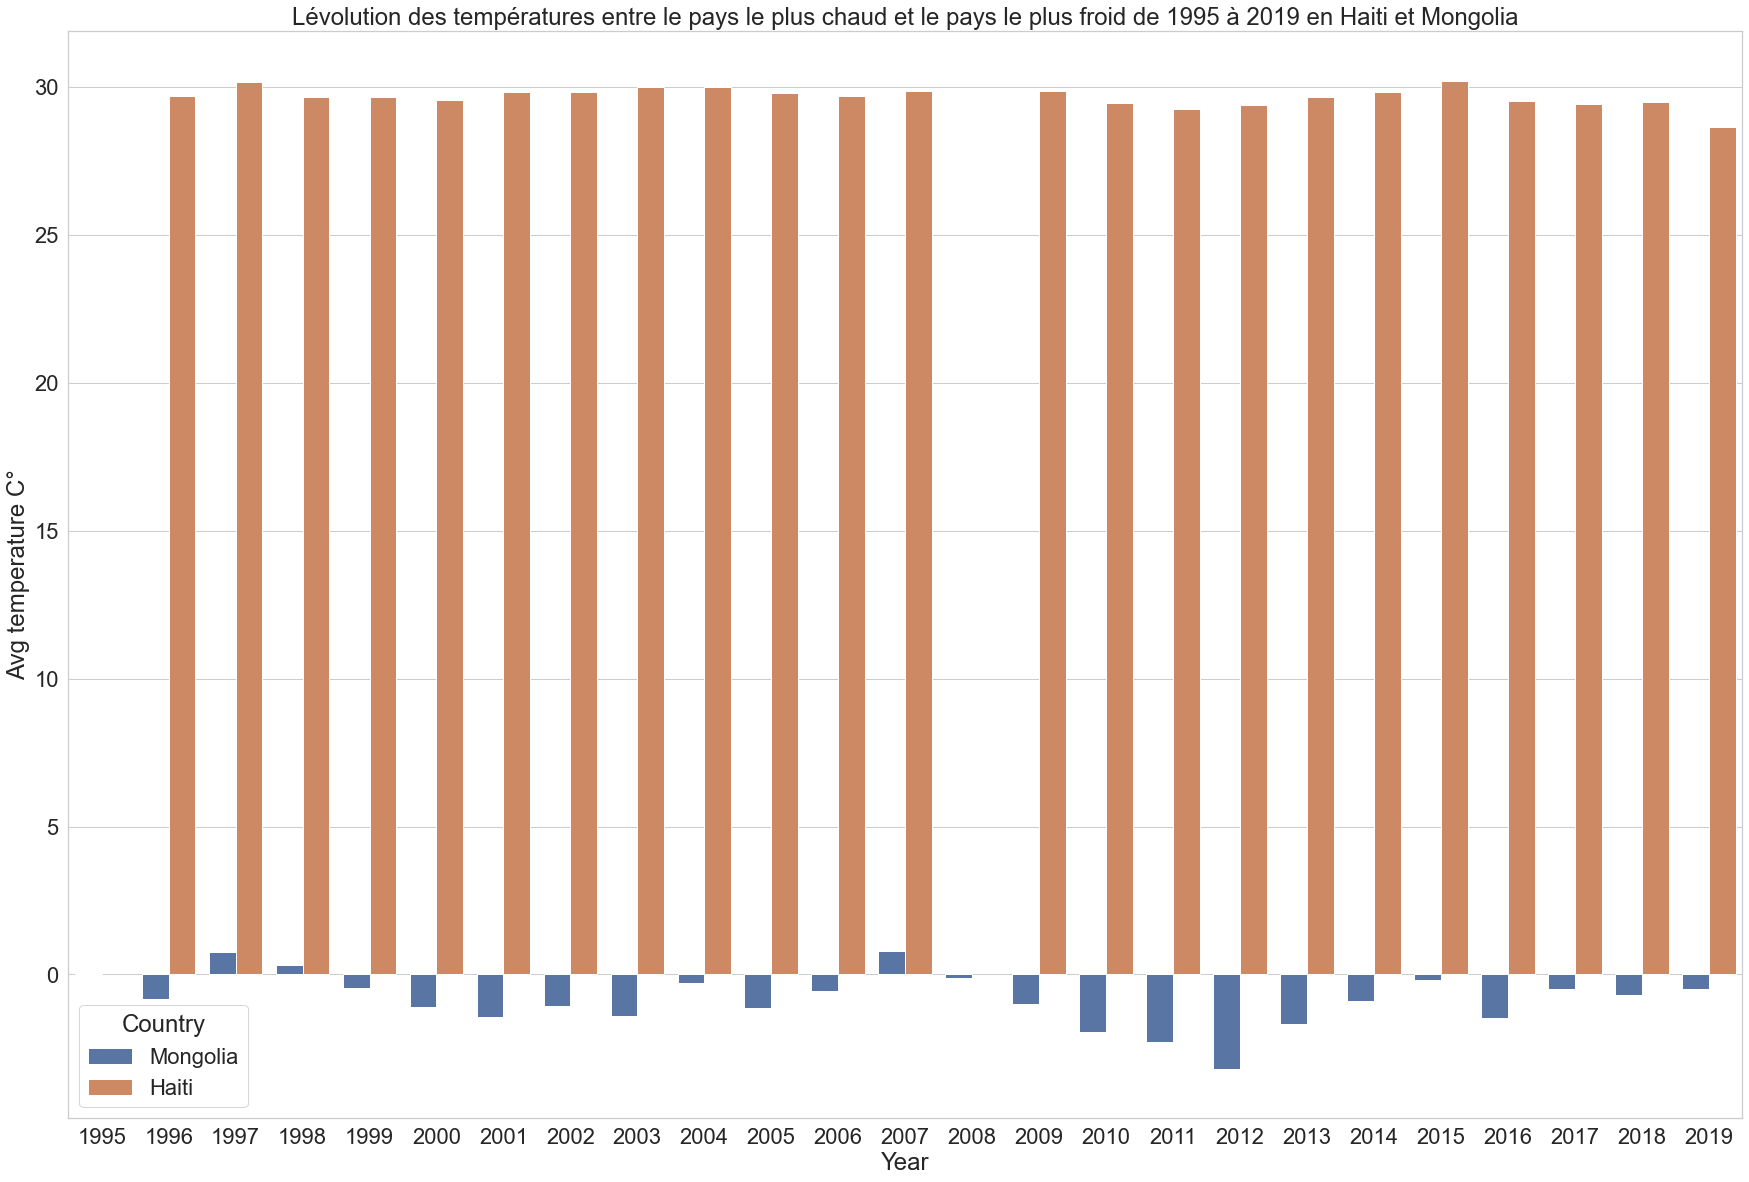

In [296]:
hotest_country = df_req_3_sorted.head(1)
coldest_country = df_req_3_sorted.tail(1)

req_4 = df_temperatures_cleaned.groupby(["Country","Year"])["AvgTemperature"].mean().reset_index()

df_hotest_country = req_4[req_4['Country'] == hotest_country.iloc[0]['Country']]
df_coldest_country = req_4[req_4['Country'] == coldest_country.iloc[0]['Country']]

coldest_and_hotest = pd.concat([df_hotest_country, df_coldest_country])

plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Year", y="AvgTemperature", hue="Country", data=coldest_and_hotest.sort_values(['Year', 'AvgTemperature']))
plt.xlabel("Year")
plt.ylabel("Avg temperature C°")
plt.title("Lévolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 en %s et %s" % (hotest_country.iloc[0]['Country'], coldest_country.iloc[0]['Country']) )

### Evolution moyenne de la température de Paris

Text(0.5, 1.0, 'Evolution moyenne de la température de Paris')

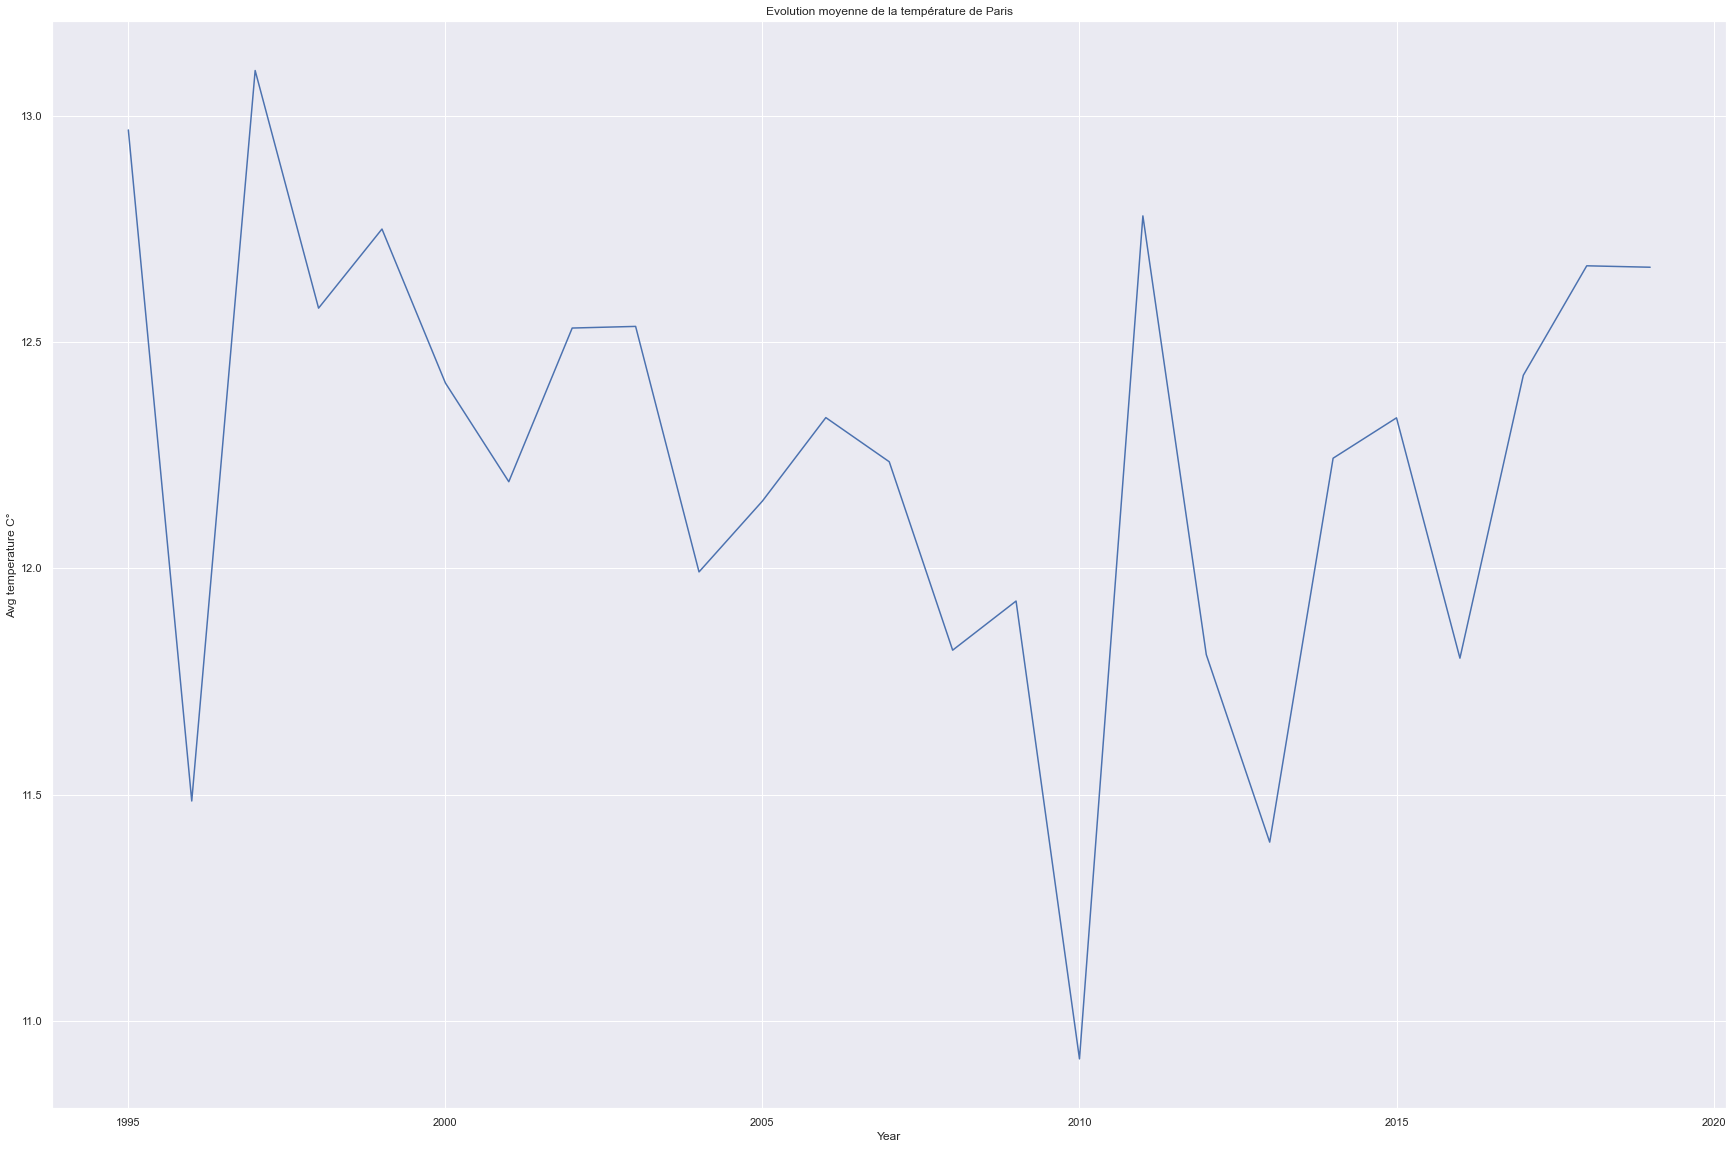

In [297]:
city = df_temperatures_cleaned.loc[df_temperatures_cleaned['City'] == 'Paris']
req_5 = city.groupby(['Year'])['AvgTemperature'].mean().reset_index()
plt.figure(figsize=(30,20))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="AvgTemperature", data=req_5, markers=True, dashes=True)
plt.xlabel("Year")
plt.ylabel("Avg temperature C°")
plt.title("Evolution moyenne de la température de Paris")